## Implementasi Convex Hull untuk Visualisasi Tes *Linear Separability Dataset*

#### Jason Kanggara 13520080

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import ConvexHull # Library Convex Hull Bawaan
from myConvexHull import myConvexHull # Library Convex Hull oleh Jason

### Dataset Iris

In [2]:
data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Library Bawaan

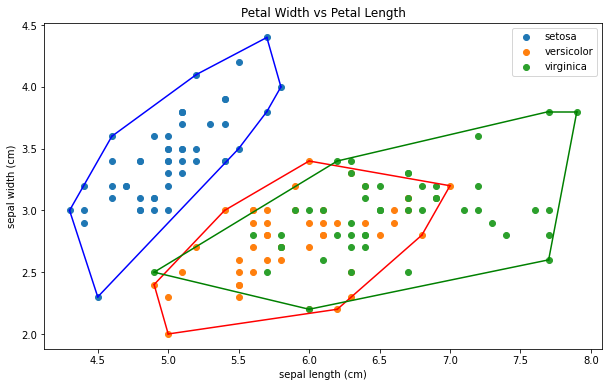

In [3]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = ConvexHull(bucket) 
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull.simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

plt.legend()


##### Library Jason

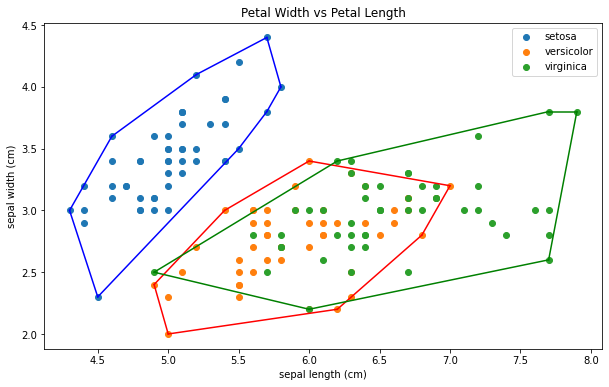

In [4]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    
plt.legend()

### Dataset Diabetes

In [5]:
data = datasets.load_diabetes() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


##### Library Bawaan

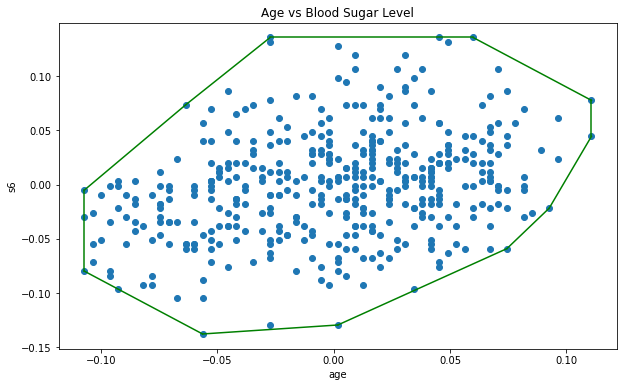

In [6]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Age vs Blood Sugar Level')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[9])

bucket = df.iloc[:,[0,9]].values
# bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
hull = ConvexHull(bucket) 
plt.scatter(bucket[:, 0], bucket[:, 1])

for simplex in hull.simplices:
  plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

##### Library Jason

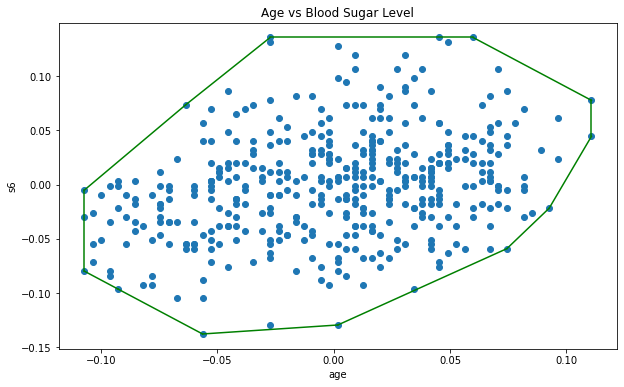

In [7]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Age vs Blood Sugar Level')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[9])

bucket = df.iloc[:,[0,9]].values
# bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
hull = myConvexHull(bucket) 
plt.scatter(bucket[:, 0], bucket[:, 1])

for simplex in hull:
  plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

### Dataset Alcohol

In [8]:
data = datasets.load_wine() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### Library Bawaan

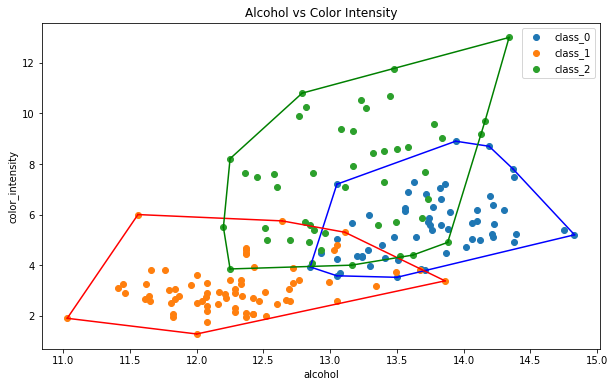

In [9]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Color Intensity')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[9])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,9]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = ConvexHull(bucket) 
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull.simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

plt.legend()


##### Library Jason

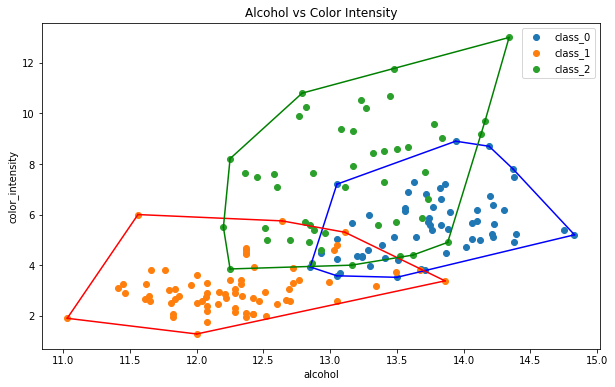

In [10]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Color Intensity')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[9])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,9]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = myConvexHull(bucket) 
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

plt.legend()
